In [1]:
%matplotlib inline 
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn import neighbors as nbhs
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

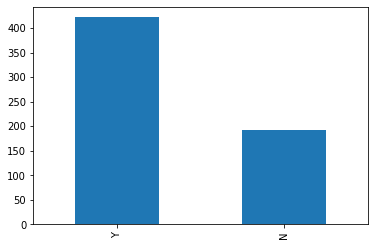

In [10]:
train['Loan_Status'].value_counts().plot.bar()

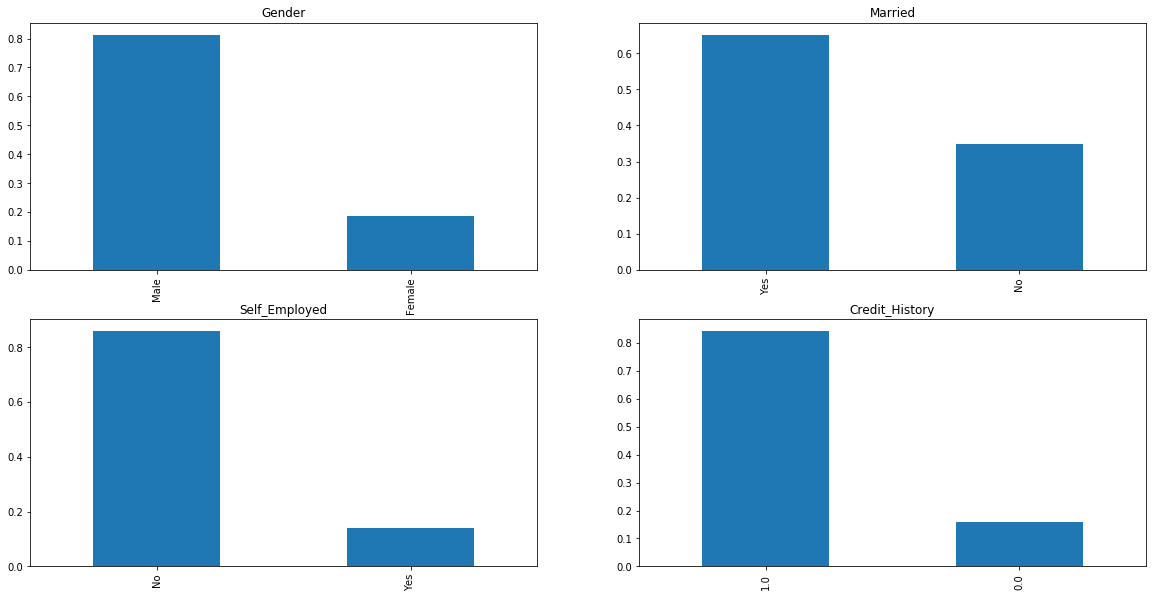

In [11]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

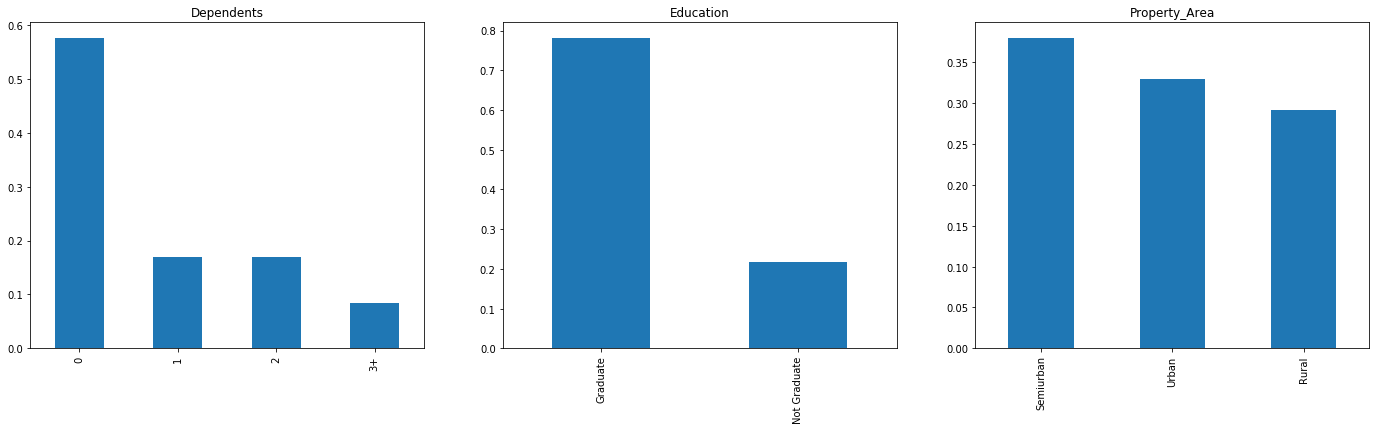

In [12]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

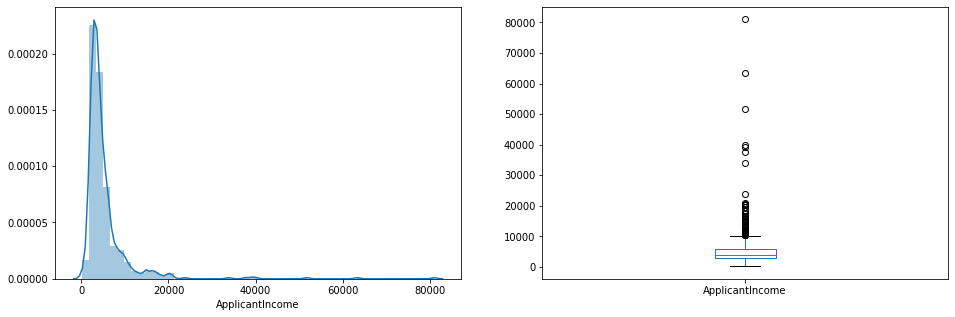

In [13]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

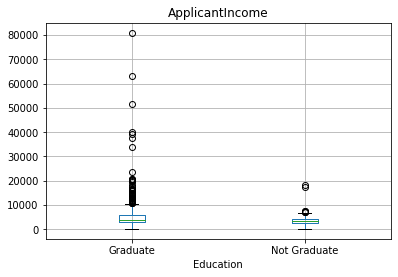

In [14]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

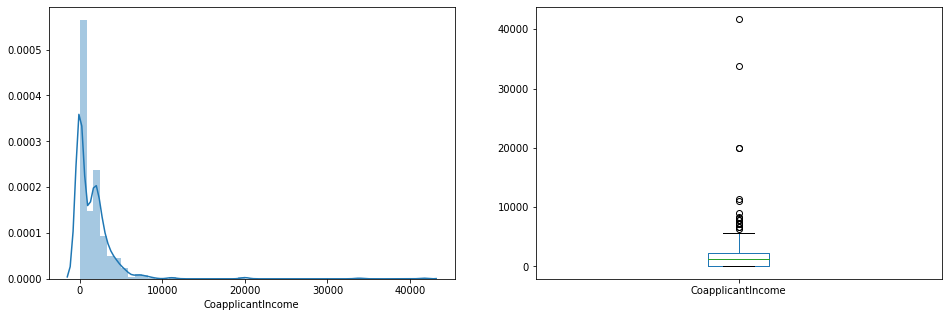

In [15]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

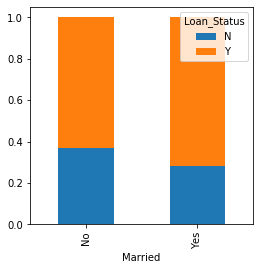

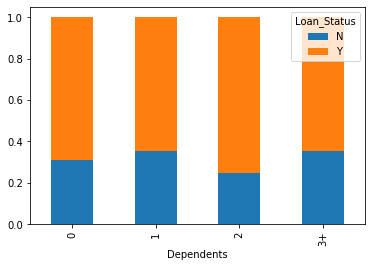

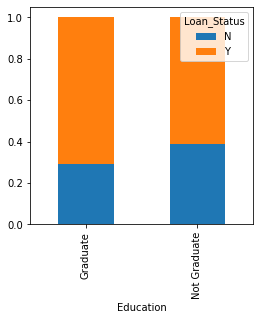

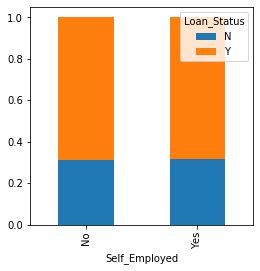

In [16]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

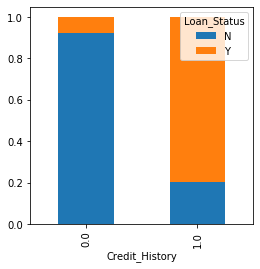

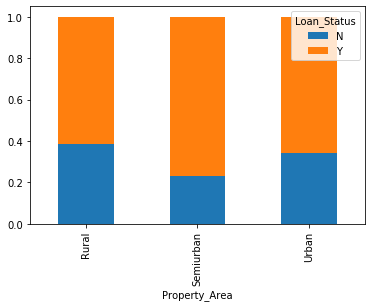

In [17]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

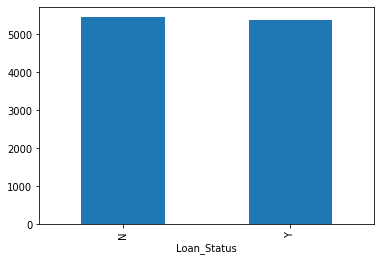

In [18]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

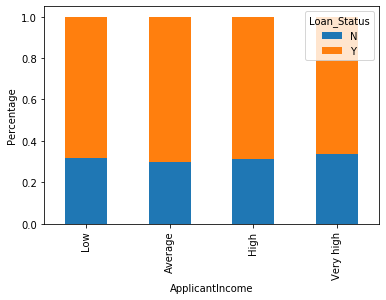

In [19]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

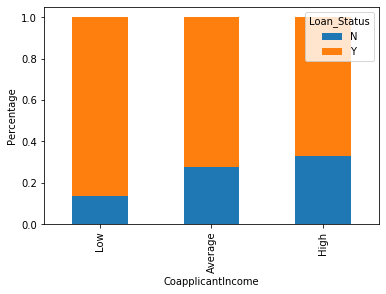

In [20]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

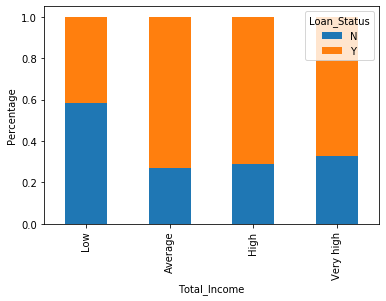

In [21]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

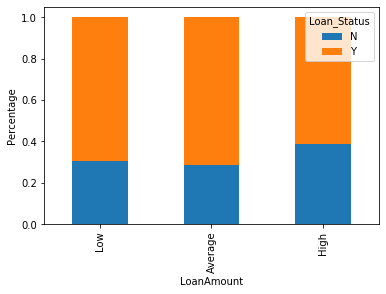

In [22]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [23]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

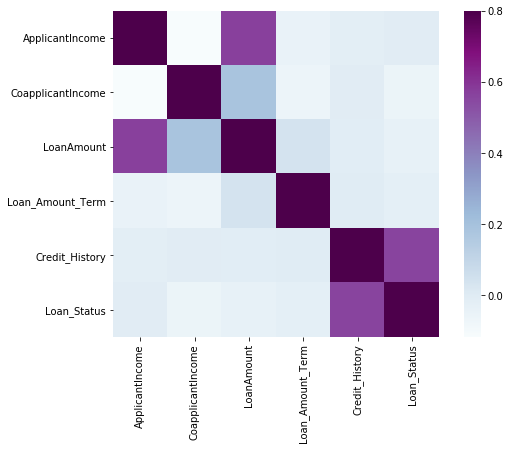

In [24]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [27]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [29]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [30]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

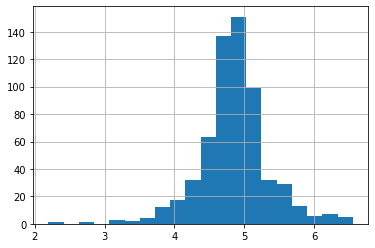

In [32]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [33]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [34]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [35]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)
XTEST = test

In [83]:
profit = [[-70 , 0],[-70 , 100]]
TNp = profit[0][0] #true not repayed
FNp = profit[0][1] #false not repayed
FPp = profit[1][0] #false repayed
TPp = profit[1][1] #true repayed

In [84]:
#True probabilities:
pp = 1/2
pn = 1/2

In [85]:
def roc(method):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, method.predict(X_test))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.grid(True)

In [86]:
def rates(TP,FP,FN,TN):
    return TP/(TP + FN), FP/(FP + TN), FN/(FN + TP), TN/(TN + FP)

def curves(model,X_test,y_test):
    scores = model.predict_proba(X_test)
    if scores.shape[1] > 1:
        scores = scores[:,1]
    y_test = y_test.to_numpy()
    scoreY = [(scores[k] , y_test[k]) for k in range(len(y_test))]
    scoreY.sort(key=(lambda x: x[0]),reverse=True)
    
    Profit = np.zeros(len(y_test)+1)
    CumResp = np.zeros(len(y_test)+1)
    Lift = np.zeros(len(y_test)+1)
    ROC = np.zeros((len(y_test)+1,2))
    AUC = 0
    x0 = 0
    
    TP, FP, FN, TN = 0, 0, sum(y_test == True), sum(y_test == False)
    TPR, FPR, FNR, TNR = rates(TP,FP,FN,TN)
    Profit[0] = pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)
    CumResp[0] = 0
    Lift[0] = 1
    ROC[0,:] = FPR, TPR
    if FPR > x0:
        AUC += TPR*(FPR-x0)
        x0 = FPR
    
    for k in range(len(y_test)):
        if scoreY[k][1]:
            TP = TP + 1
            FN = FN - 1
        else:
            FP = FP + 1
            TN = TN - 1
        TPR, FPR, FNR, TNR = rates(TP,FP,FN,TN)
        kk = k+1
        Profit[kk] = pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)
        CumResp[kk] = TPR
        Lift[kk] = TPR/(kk/len(y_test))
        ROC[kk,:] = FPR, TPR
        if FPR > x0:
            AUC += TPR*(FPR-x0)
            x0 = FPR
    AUC += 1-x0
    return Profit, CumResp, Lift, ROC, AUC

In [87]:
x = range(len(y_test)+1)
x = [x[k]/len(y_test) for k in range(len(x))]

def plot_curves(Profit, Cumulative, Lift, ROC, curve_type):
    #Profit Curves
    plt.figure()
    plt.plot([0,1],[nbcProfit[0],nbcProfit[-1]])
    plt.plot(x,Profit)
    plt.legend(("Random", curve_type))
    plt.title("Profit Curve")
    plt.xlabel("% Data")
    plt.ylabel("Profit ($)")

    #Cumulative Response Curves
    plt.figure()
    plt.plot([0,1],[0,1])
    plt.plot(x,Cumulative)
    plt.legend(("Random", curve_type))
    plt.title("Cumulative Response Curve")
    plt.xlabel("% Data")
    plt.ylabel("TPR")

    #Lift Curves
    plt.figure()
    plt.plot(x,np.ones(len(x)))
    plt.plot(x,Lift)
    plt.legend(("Random", curve_type))
    plt.title("Lift Curve")
    plt.xlabel("% Data")
    plt.ylabel("Lift")

    #ROC Curves
    plt.figure()
    plt.plot([0,1],[0,1])
    plt.plot(ROC[:,0],ROC[:,1])
    plt.legend(("Random", curve_type))
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

# Naive Bayes

RBF SVM predictions:
 [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 30   5]
 [ 34 116]]
Expected profit on THIS dataset: 16.596736596736598
Expected profit for comparison: 12.933884297520663
nbcAUC: 0.7694989669421485


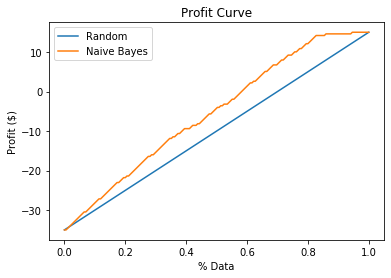

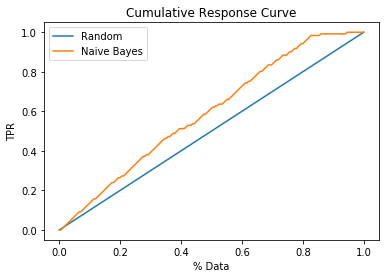

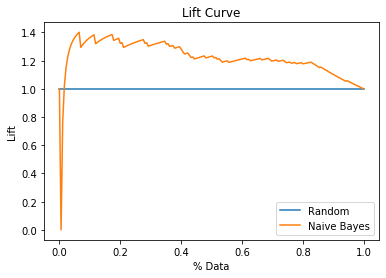

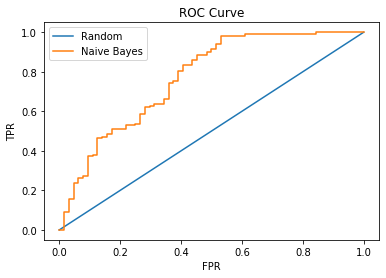

In [88]:
nbc = naive_bayes.GaussianNB()
nbc.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(nbc.predict(X_test), y_test)
print('RBF SVM predictions:\n',nbc.predict(XTEST))
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")
TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
nbcProfit, nbcCumResp, nbcLift, nbcROC, nbcAUC = curves(nbc,X_test,y_test)
print("nbcAUC: " + str(nbcAUC))

plot_curves(nbcProfit, nbcCumResp, nbcLift, nbcROC, "Naive Bayes")

# Multiple logistic regression

[[ 31   2]
 [ 33 119]]
RBF SVM predictions:
 [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
Expected profit on THIS dataset: 17.296037296037294
Expected profit for comparison: 14.173553719008268
logregAUC: 0.7663997933884292


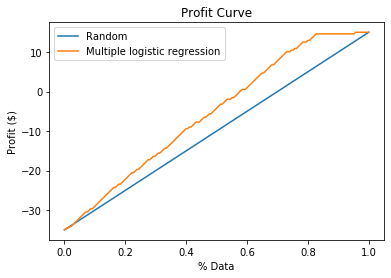

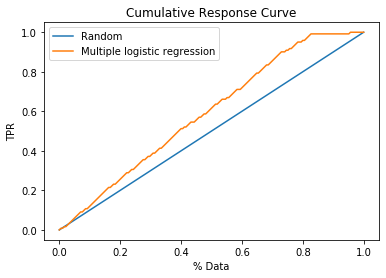

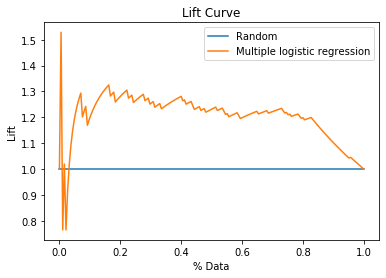

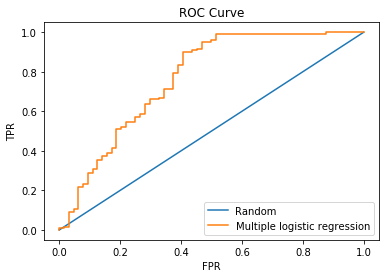

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, np.ravel(y_train))

CMnorm = confusion_matrix(logreg.predict(X_test), y_test)
print(CMnorm)
print('RBF SVM predictions:\n',logreg.predict(XTEST))
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
logregProfit, logregCumResp, logregLift, logregROC, logregAUC = curves(logreg,X_test,y_test)
print("logregAUC: " + str(logregAUC))


plot_curves(logregProfit, logregCumResp, logregLift, logregROC, "Multiple logistic regression")

# Support vector machine with radial basis function kernel

[[  1   0]
 [ 63 121]]
RBF SVM predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Expected profit on THIS dataset: 17.762237762237763
Expected profit for comparison: 15.0
svcrbfAUC: 0.597236570247934


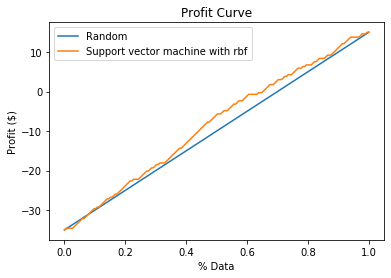

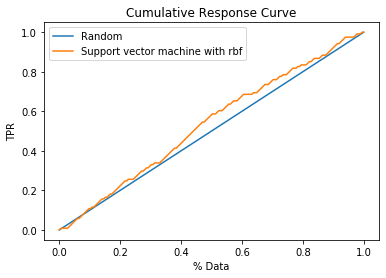

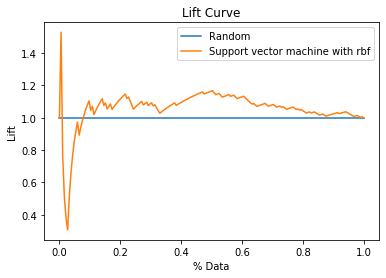

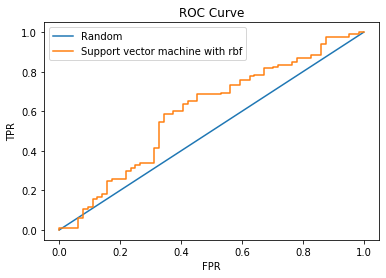

In [90]:
svcrbf = svm.SVC(kernel='rbf',gamma='auto', probability = True)
svcrbf.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(svcrbf.predict(X_test), y_test)
print(CMnorm)
print('RBF SVM predictions:\n',svcrbf.predict(XTEST))
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
svcrbfProfit, svcrbfCumResp, svcrbfLift, svcrbfROC, svcrbfAUC = curves(svcrbf,X_test,y_test)
print("svcrbfAUC: " + str(svcrbfAUC))
plot_curves(svcrbfProfit, svcrbfCumResp, svcrbfLift, svcrbfROC, "Support vector machine with rbf")

# k-nearest neighbor

[[ 11  12]
 [ 53 109]]
RBF SVM predictions:
 [1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
Expected profit on THIS dataset: 14.965034965034965
Expected profit for comparison: 10.041322314049587
knnAUC: 0.5574638429752067


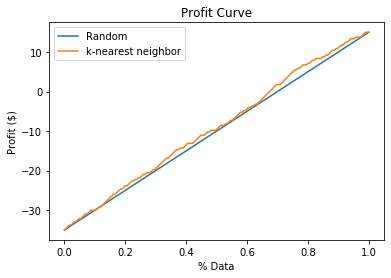

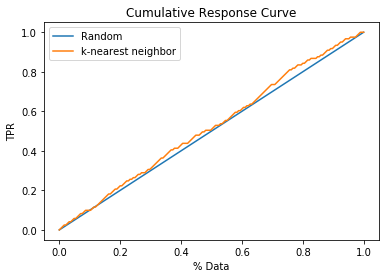

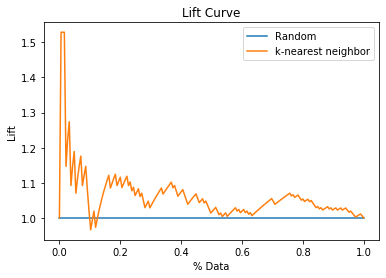

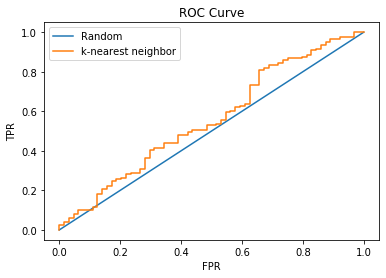

In [91]:
kNN=KNeighborsClassifier()
kNN.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(kNN.predict(X_test), y_test)
print(CMnorm)
print('RBF SVM predictions:\n',kNN.predict(XTEST))
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
knnProfit, knnCumResp, knnLift, knnROC, knnAUC = curves(kNN,X_test,y_test)
print("knnAUC: " + str(knnAUC))
plot_curves(knnProfit, knnCumResp, knnLift, knnROC, "k-nearest neighbor")

# Decision tree

[[40 25]
 [24 96]]
RBF SVM predictions:
 [1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
Expected profit on THIS dataset: 11.934731934731936
Expected profit for comparison: 4.669421487603309
dtcAUC: 0.7379907024793391


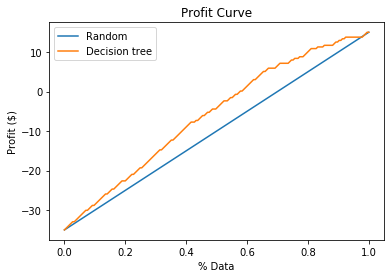

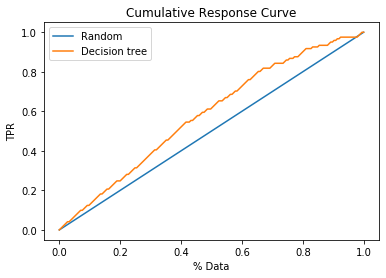

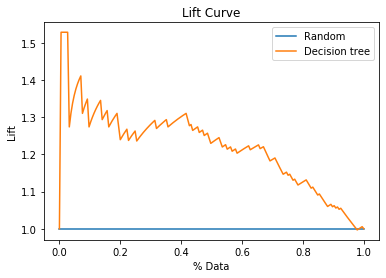

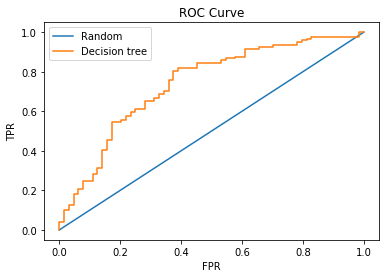

In [92]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(dtc.predict(X_test), y_test)
print(CMnorm)
print('RBF SVM predictions:\n',dtc.predict(XTEST))
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
dtcProfit, dtcCumResp, dtcLift, dtcROC, dtcAUC = curves(dtc,X_test,y_test)
print("dtcAUC: " + str(dtcAUC))
plot_curves(dtcProfit, dtcCumResp, dtcLift, dtcROC, "Decision tree")

# Random forest

[[ 39  19]
 [ 25 102]]
RBF SVM predictions:
 [1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1]
Expected profit on THIS dataset: 13.333333333333334
Expected profit for comparison: 7.1487603305785115
rfcAUC: 0.7882231404958672


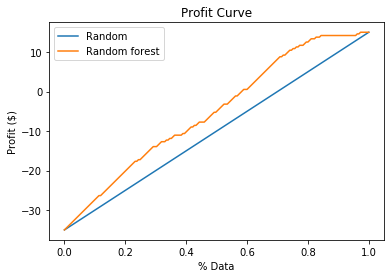

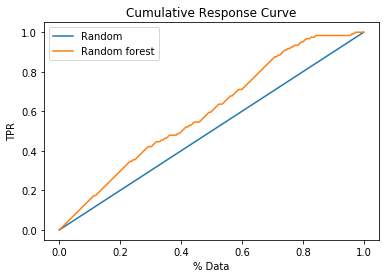

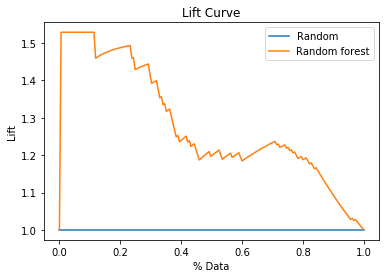

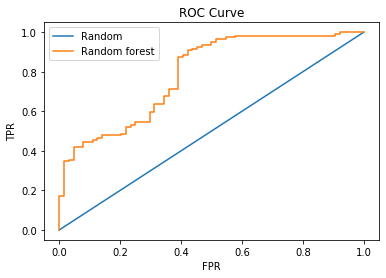

In [93]:
rfc = ensemble.RandomForestClassifier(criterion='entropy',n_estimators=10)
rfc.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(rfc.predict(X_test), y_test)
print(CMnorm)
print('RBF SVM predictions:\n',rfc.predict(XTEST))
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
rfcProfit, rfcCumResp, rfcLift, rfcROC, rfcAUC = curves(rfc,X_test,y_test)
print("rfcAUC: " + str(rfcAUC))
plot_curves(rfcProfit, rfcCumResp, rfcLift, rfcROC, "Random forest")

# Neural network

In [94]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [95]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
from tensorflow import set_random_seed

model = create_model(act='relu')

[[  2   6]
 [ 62 115]]
Expected profit on THIS dataset: 16.363636363636363
Expected profit for comparison: 12.520661157024797
nnetAUC: 0.4744318181818181


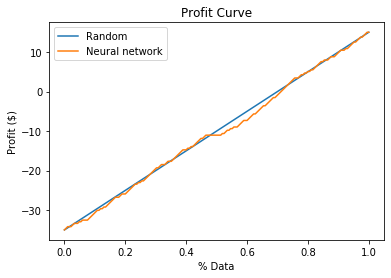

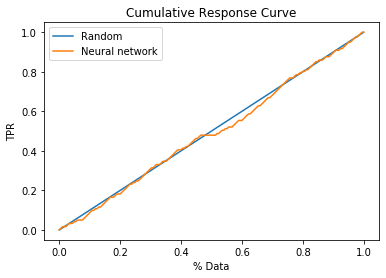

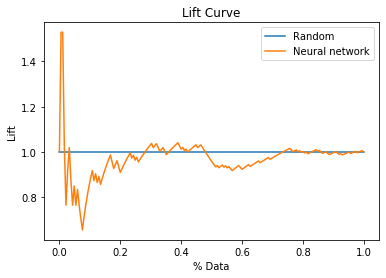

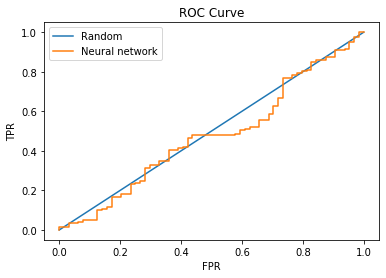

In [96]:
# Neural network
model.fit(X_train, np.ravel(y_train), epochs = 500, batch_size = 200, validation_split = 0.5, verbose = 0)
CMnorm = confusion_matrix(model.predict(X_test) > 0.5, y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
nnetProfit, nnetCumResp, nnetLift, nnetROC, nnetAUC = curves(model,X_test,y_test)
print("nnetAUC: " + str(nnetAUC))
plot_curves(nnetProfit, nnetCumResp, nnetLift, nnetROC, "Neural network")

Text(0, 0.5, 'TPR')

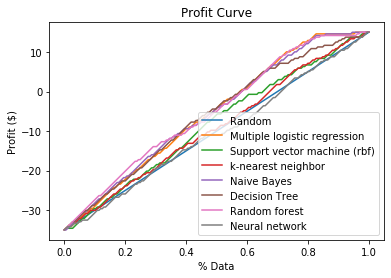

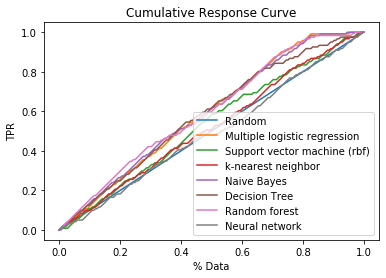

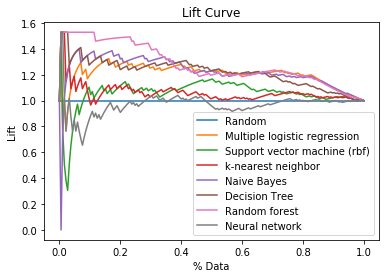

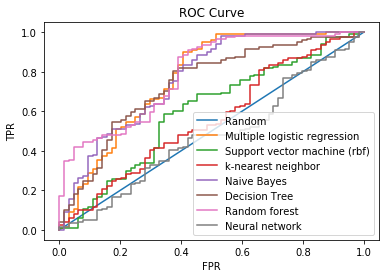

In [98]:
x = range(len(y_test)+1)
x = [x[k]/len(y_test) for k in range(len(x))]
all_curves = ("Random", "Multiple logistic regression", 
              "Support vector machine (rbf)", "k-nearest neighbor", "Naive Bayes","Decision Tree", 
              "Random forest", "Neural network")

#Profit Curves
plt.figure()
plt.plot([0,1],[nbcProfit[0],nbcProfit[-1]])
plt.plot(x,logregProfit)
# plt.plot(x,svclProfit)
plt.plot(x,svcrbfProfit)
plt.plot(x,knnProfit)
plt.plot(x,nbcProfit)
plt.plot(x,dtcProfit)
plt.plot(x,rfcProfit)
plt.plot(x,nnetProfit)
plt.legend(all_curves)
plt.title("Profit Curve")
plt.xlabel("% Data")
plt.ylabel("Profit ($)")

#Cumulative Response Curves
plt.figure()
plt.plot([0,1],[0,1])
plt.plot(x,logregCumResp)
# plt.plot(x,svclCumResp)
plt.plot(x,svcrbfCumResp)
plt.plot(x,knnCumResp)
plt.plot(x,nbcCumResp)
plt.plot(x,dtcCumResp)
plt.plot(x,rfcCumResp)
plt.plot(x,nnetCumResp)
plt.legend(all_curves)
plt.title("Cumulative Response Curve")
plt.xlabel("% Data")
plt.ylabel("TPR")

#Lift Curves
plt.figure()
plt.plot(x,np.ones(len(x)))
plt.plot(x,logregLift)
# plt.plot(x,svclLift)
plt.plot(x,svcrbfLift)
plt.plot(x,knnLift)
plt.plot(x,nbcLift)
plt.plot(x,dtcLift)
plt.plot(x,rfcLift)
plt.plot(x,nnetLift)
plt.legend(all_curves)
plt.title("Lift Curve")
plt.xlabel("% Data")
plt.ylabel("Lift")

#ROC Curves
plt.figure()
plt.plot([0,1],[0,1])
plt.plot(logregROC[:,0],logregROC[:,1])
# plt.plot(svclROC[:,0],svclROC[:,1])
plt.plot(svcrbfROC[:,0],svcrbfROC[:,1])
plt.plot(knnROC[:,0],knnROC[:,1])
plt.plot(nbcROC[:,0],nbcROC[:,1])
plt.plot(dtcROC[:,0],dtcROC[:,1])
plt.plot(rfcROC[:,0],rfcROC[:,1])
plt.plot(nnetROC[:,0],nnetROC[:,1])
plt.legend(all_curves)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")